In [1]:
!unzip '/content/archive (7).zip'

Archive:  /content/archive (7).zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


In [5]:
# Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} | Accuracy={acc:.2f}")


K=1 | Accuracy=0.98
K=2 | Accuracy=0.98
K=3 | Accuracy=1.00
K=4 | Accuracy=0.98
K=5 | Accuracy=1.00
K=6 | Accuracy=1.00
K=7 | Accuracy=1.00
K=8 | Accuracy=1.00
K=9 | Accuracy=1.00
K=10 | Accuracy=1.00


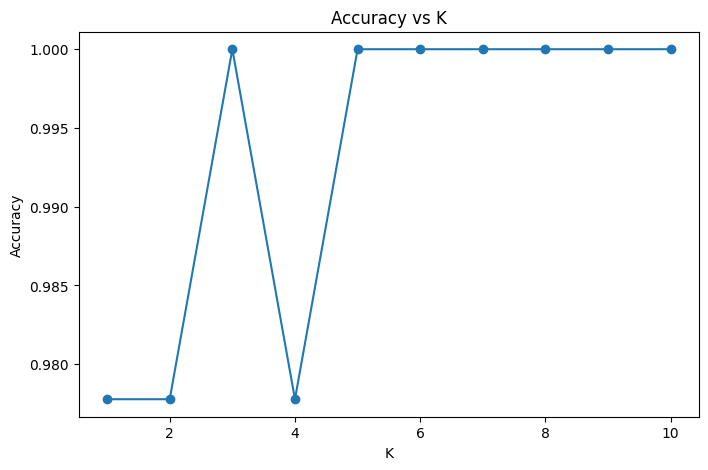

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


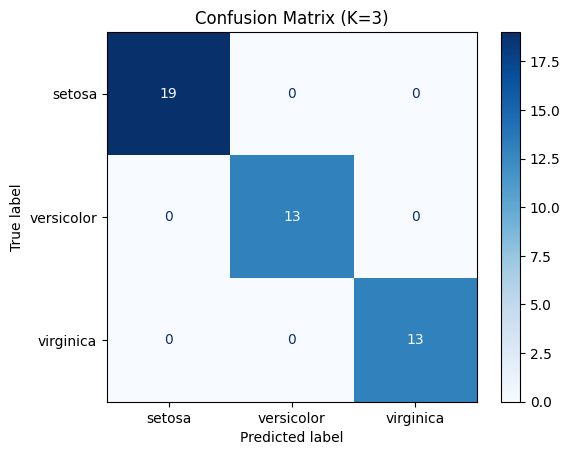

In [12]:
best_k = k_values[np.argmax(accuracies)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_best_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


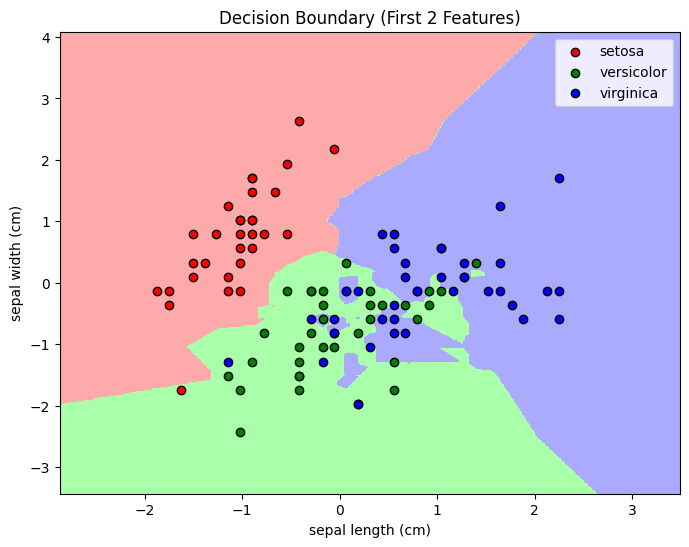

In [14]:
# Use only the first 2 features
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train KNN
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Meshgrid for decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

for i, color in zip(np.unique(y_train_2d), ['red', 'green', 'blue']):
    plt.scatter(*X_train_2d[y_train_2d == i].T, c=color, label=target_names[i], edgecolor='k')

plt.legend()
plt.title("Decision Boundary (First 2 Features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()
